<a href="https://colab.research.google.com/github/DeviManognya/xyz/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from datetime import datetime
import math

import pickle

In [ ]:
features=pd.read_csv('/content/features.csv')

In [ ]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
sample=pd.read_csv('/content/sampleSubmission.csv')

In [ ]:
sample.head()

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0


In [ ]:
stores=pd.read_csv('/content/stores.csv')

In [ ]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
test=pd.read_csv('/content/test.csv')

In [ ]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [ ]:
train=pd.read_csv('/content/train.csv')

In [ ]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [ ]:
sample.describe()

,Weekly_Sales
count,115064.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [ ]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [ ]:
test.describe()

,Store,Dept
count,115064.000000,115064.000000
mean,22.238207,44.339524
std,12.809930,30.656410
min,1.000000,1.000000
25%,11.000000,18.000000
50%,22.000000,37.000000
75%,33.000000,74.000000
max,45.000000,99.000000


In [ ]:
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Id            115064 non-null  object
 1   Weekly_Sales  115064 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Store      115064 non-null  int64 
 1   Dept       115064 non-null  int64 
 2   Date       115064 non-null  object
 3   IsHoliday  115064 non-null  bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 2.7+ MB


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [ ]:
sample.isnull().sum()

Id              0
Weekly_Sales    0
dtype: int64

In [ ]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [ ]:
test.isnull().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [ ]:
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [ ]:
data = train.merge(features, on=['Store','Date'], how='inner').merge(stores, on=['Store'], how='inner')
print(data.shape)

(421570, 17)


In [ ]:
data['MarkDown1']=data['MarkDown1'].replace(np.nan, 0)
data['MarkDown2']=data['MarkDown2'].replace(np.nan, 0)
data['MarkDown3']=data['MarkDown3'].replace(np.nan, 0)
data['MarkDown4']=data['MarkDown4'].replace(np.nan, 0)
data['MarkDown5']=data['MarkDown5'].replace(np.nan, 0)

In [ ]:
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [ ]:
data = data[data['Weekly_Sales'] >= 0]

In [ ]:
data.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000
mean,22.195477,44.242771,16030.329773,60.090474,3.360888,2590.187246,878.803239,468.771234,1083.462694,1662.706138,171.212152,7.960077,136749.569176
std,12.787213,30.507197,22728.500149,18.448260,0.458523,6053.225499,5076.525234,5533.593113,3895.801513,4205.946641,39.162280,1.863873,60992.688568
min,1.000000,1.000000,0.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2117.560000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7659.090000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20268.380000,74.280000,3.738000,2801.500000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


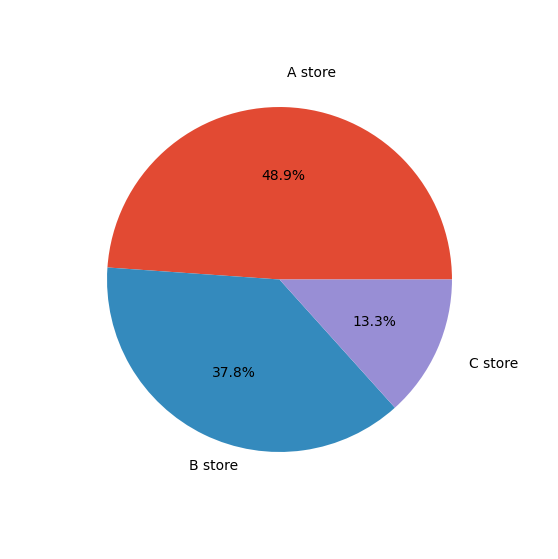

In [ ]:
sorted_type = stores.groupby('Type')
plt.style.use('ggplot')
labels=['A store','B store','C store']
sizes=sorted_type.describe()['Size'].round(1)
sizes=[(22/(17+6+22))*100,(17/(17+6+22))*100,(6/(17+6+22))*100]
fig, axes = plt.subplots(1,1, figsize=(7,7))

axes.pie(sizes,
         labels=labels,
         explode=(0,0,0),
         autopct='%1.1f%%',
         pctdistance=0.6,
         labeldistance=1.2,
         radius=0.8,
         center=(0.5,0.5))
plt.show()

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

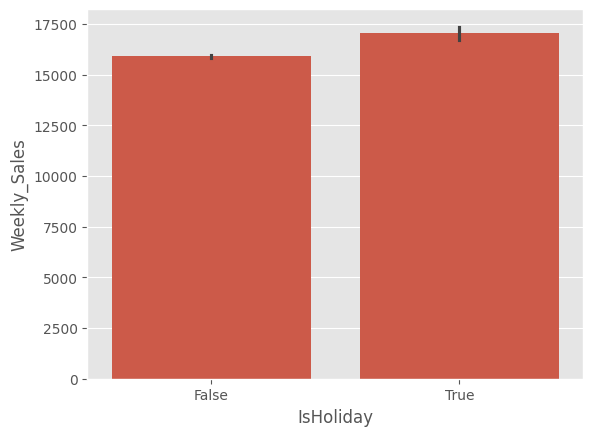

In [ ]:
#weekly sales on Holidays
holiday=train['Weekly_Sales'].loc[train['IsHoliday']== True]

#weekly sales on non-holidays.
non_holiday = train['Weekly_Sales'].loc[train['IsHoliday']== False]
sns.barplot(x='IsHoliday',y='Weekly_Sales', data=train)

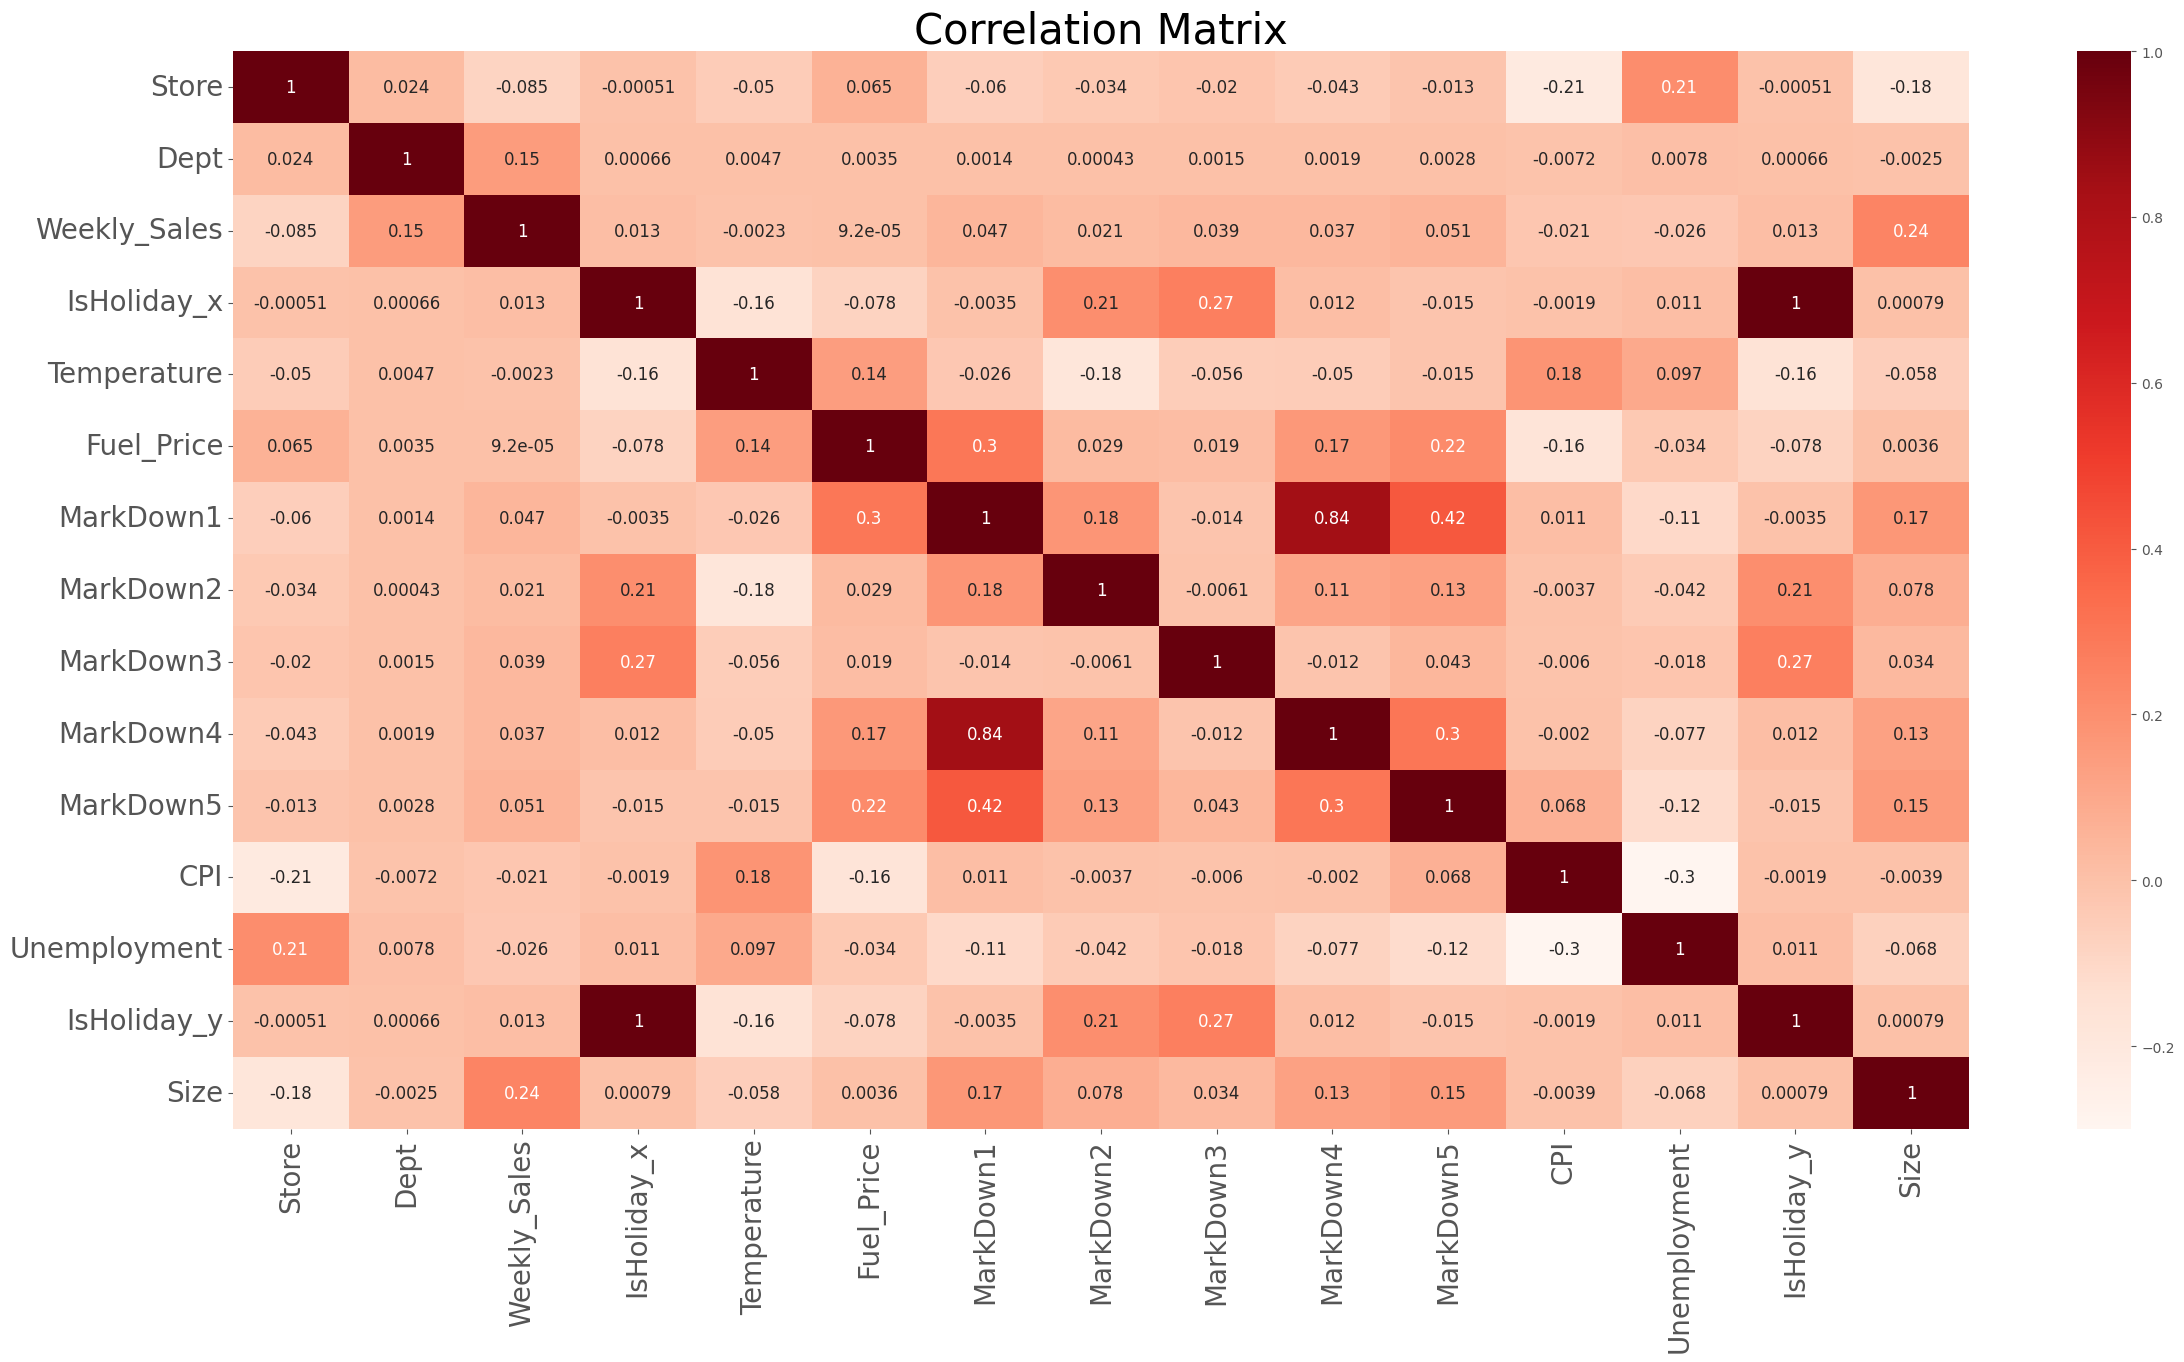

In [ ]:
plt.figure(figsize=(28,14))
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)

import pandas as pd

corr_matrix = data.corr(numeric_only=True)

sns.heatmap(corr_matrix, cmap='Reds', annot=True, annot_kws={'size':12})
plt.title('Correlation Matrix', fontsize=30)
plt.show()

In [ ]:
data=pd.get_dummies(data,columns=['Type'])

In [ ]:
data['Date']=pd.to_datetime(data['Date'])


In [ ]:
data['month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [ ]:
data[['Date','month', 'Year']].head()

,Date,month,Year
0,2010-02-05,2,2010
1,2010-02-05,2,2010
2,2010-02-05,2,2010
3,2010-02-05,2,2010
4,2010-02-05,2,2010


In [ ]:
data['dayofweek_name'] = data['Date'].dt.day_name()
data[['Date','dayofweek_name']].head()

,Date,dayofweek_name
0,2010-02-05,Friday
1,2010-02-05,Friday
2,2010-02-05,Friday
3,2010-02-05,Friday
4,2010-02-05,Friday


In [ ]:
data['is_weekend'] = np.where(data['dayofweek_name'].isin(['Sunday', 'Saturday']), 1, 0)
data[['Date','is_weekend']].head()

,Date,is_weekend
0,2010-02-05,0
1,2010-02-05,0
2,2010-02-05,0
3,2010-02-05,0
4,2010-02-05,0


In [ ]:
data["IsHoliday_x"] = data["IsHoliday_x"].astype(bool)
del data['dayofweek_name']
#del df['Date']

In [ ]:
print(data.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50        False        42.31       2.572   
1      1     2 2010-02-05      50605.27        False        42.31       2.572   
2      1     3 2010-02-05      13740.12        False        42.31       2.572   
3      1     4 2010-02-05      39954.04        False        42.31       2.572   
4      1     5 2010-02-05      32229.38        False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  ...         CPI  Unemployment  \
0        0.0        0.0        0.0  ...  211.096358         8.106   
1        0.0        0.0        0.0  ...  211.096358         8.106   
2        0.0        0.0        0.0  ...  211.096358         8.106   
3        0.0        0.0        0.0  ...  211.096358         8.106   
4        0.0        0.0        0.0  ...  211.096358         8.106   

   IsHoliday_y    Size  Type_A  Type_B  Type_C  month  Year  is_weekend  
0        False  151315  

In [ ]:
data.to_csv('merged_data.csv', index=False)

In [ ]:
X = data.loc[:, data.columns != 'Weekly_Sales']
y = data.loc[:, data.columns == 'Weekly_Sales']

X = X[["Store", "Dept", "Size", "IsHoliday_x", "CPI", "Temperature", "Type_B","Type_C", "month", "Year", "IsHoliday_y"]]
y = y.values.reshape(-1,1)
print(X.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


   Store  Dept    Size  IsHoliday_x         CPI  Temperature  Type_B  Type_C  \
0      1     1  151315        False  211.096358        42.31   False   False   
1      1     2  151315        False  211.096358        42.31   False   False   
2      1     3  151315        False  211.096358        42.31   False   False   
3      1     4  151315        False  211.096358        42.31   False   False   
4      1     5  151315        False  211.096358        42.31   False   False   

   month  Year  IsHoliday_y  
0      2  2010        False  
1      2  2010        False  
2      2  2010        False  
3      2  2010        False  
4      2  2010        False  


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators= 150, max_depth=30, min_samples_split=5, min_samples_leaf=5)
rf.fit(X_train, y_train.ravel())
print('Testing Accuracy:', rf.score(X_test, y_test.ravel())*100,'%')
y_pred = rf.predict(X_test)

Testing Accuracy: 96.6095394741625 %


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rms=mean_squared_error(y_test, y_pred)
print('RMSE:', rms)
print('MAE:', mean_absolute_error(y_test, y_pred))

RMSE: 17022034.479516044
MAE: 1631.1932595829512


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Testing Accuracy:', dt.score(X_test, y_test.ravel())*100,'%')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
rms=mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rms)
print('MAE:', mean_absolute_error(y_test, y_pred))

Testing Accuracy: 94.57938568433222 %
RMSE: 5216.757398094794
MAE: 2029.4765932640942


In [ ]:
print("Training Accuracy:",dt.score(X_test, y_test.ravel())*100,'%')

Training Accuracy: 94.57938568433222 %


In [ ]:
import xgboost as xgb
import warnings

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.5, nthread=4, n_estimators= 500, max_depth = 4, alpha = 10, random_state=0)
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None, nthread=4, ...)

In [ ]:
preds = xg_reg.predict(X_test)
y_pred = xg_reg.predict(X_test)
print('Accuracy:', xg_reg.score(X_test, y_test)*100,'%')
rms=mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rms)
print('MAE:', mean_absolute_error(y_test, y_pred))

Accuracy: 94.35799418498576 %
RMSE: 5322.224029718728
MAE: 2989.930520432866


In [ ]:
print('Training Accuracy:', xg_reg.score(X_train, y_train)*100,'%')

Training Accuracy: 94.13775866394528 %


In [ ]:
!pip install pmdarima
import pmdarima
from pmdarima.arima import auto_arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.3 MB/s eta 0:00:00


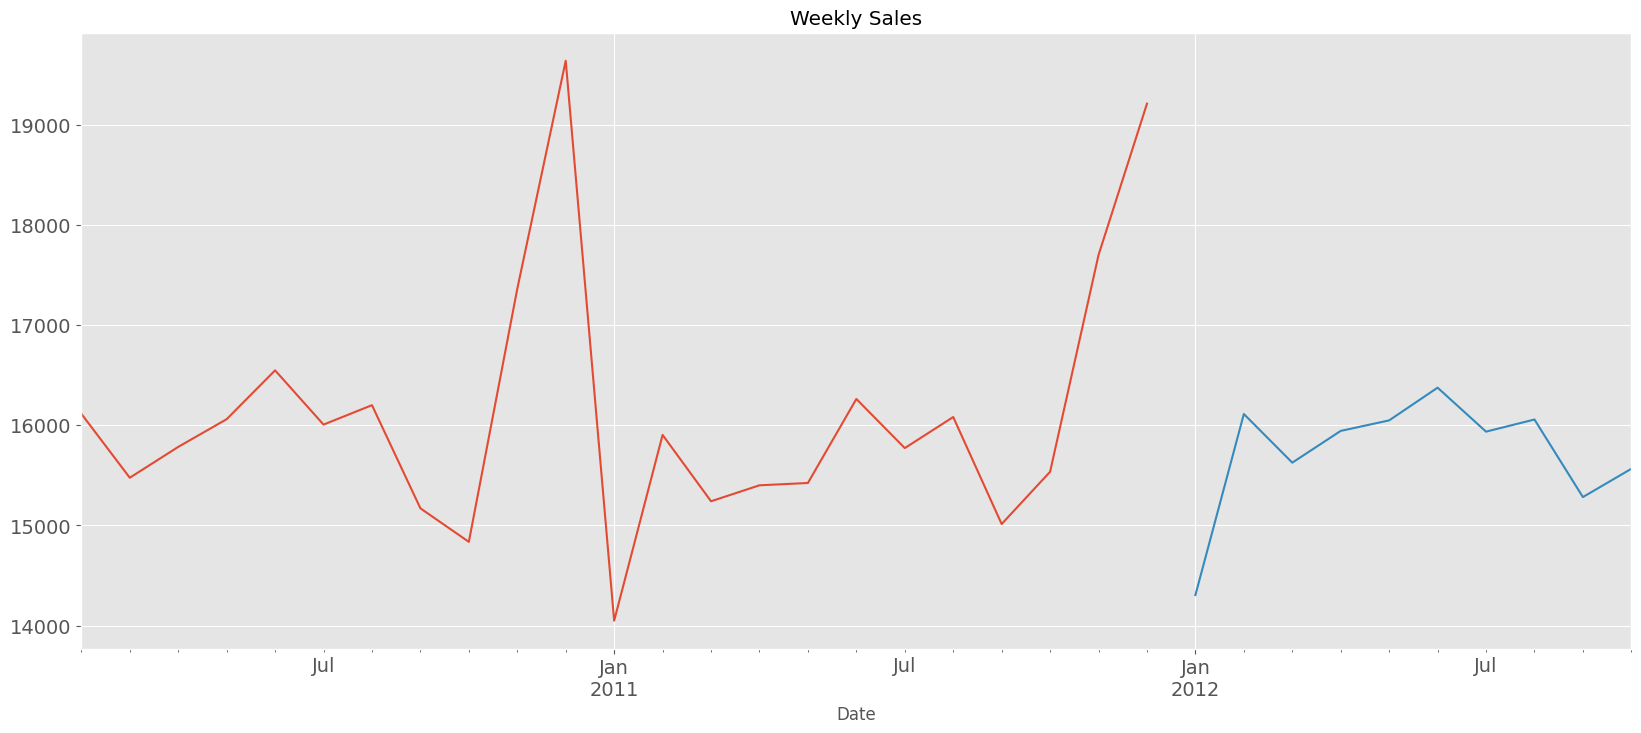

In [ ]:
import pandas as pd
data.Date = pd.to_datetime(data.Date, format='%Y-%m-%d')
data.index = data['Date']
data= data.drop('Date', axis=1)
data= data.resample('MS').mean()
train_data= data[:int(0.7*(len(data)))]
test_data= data[int(0.7*(len(data))):]
train_data= train_data['Weekly_Sales']
test_data= test_data['Weekly_Sales']
train_data.plot(figsize=(20,8), title= 'Weekly Sales', fontsize= 14)
test_data.plot(figsize=(20,8), title= 'Weekly Sales', fontsize=14)
plt.show()

In [ ]:
model_auto_arima = auto_arima(train_data, trace=True, error_action='ignore', suppress_warnings=True)
model_auto_arima = auto_arima(train_data, trace=True, start_p=0, start_q=0, start_P=0, start_Q=0, max_p=10, max_q=10, max_P=10, max_Q=10, seasonal=True, stepwise=False, suppress_warnings= True, D=1, max_D=10, error_action='ignore', approximation = False)
model_auto_arima.fit(train_data)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=405.580, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=398.029, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=399.847, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=399.604, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=513.059, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=401.739, Time=0.04 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.340 seconds
 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=398.029, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=399.604, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=399.327, Time=0.56 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=399.847, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=401.7

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

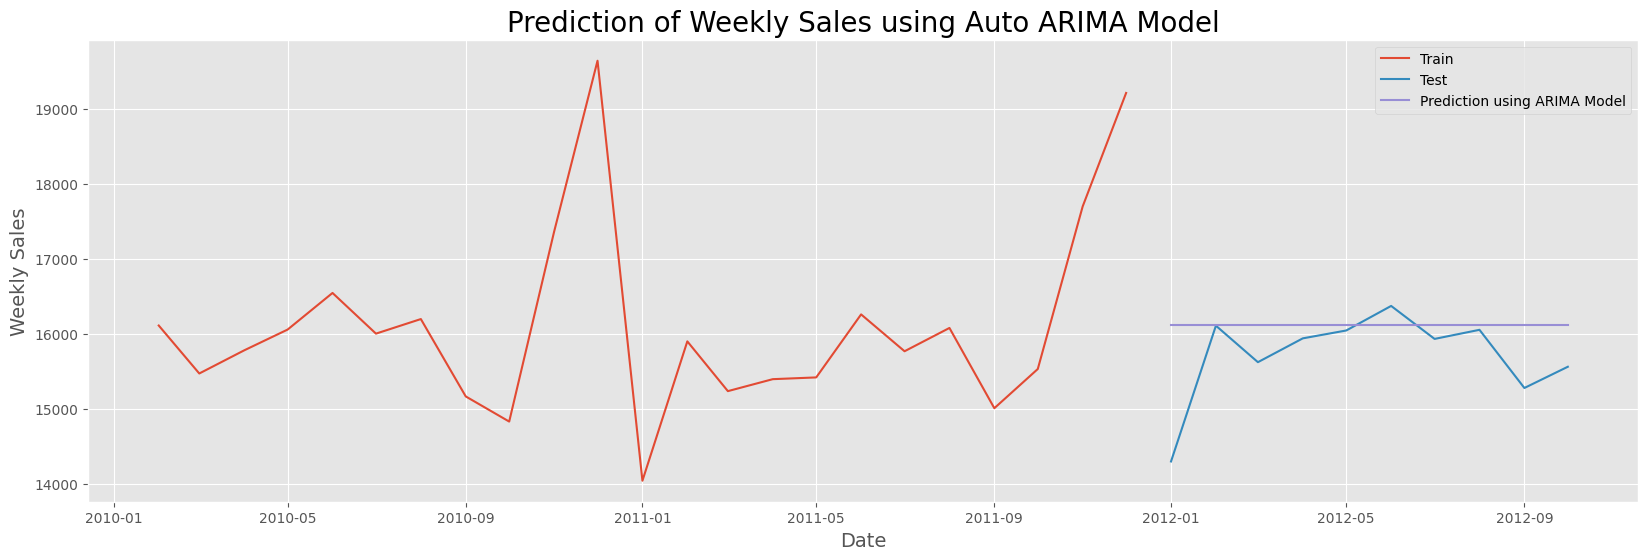

In [ ]:
forecast = model_auto_arima.predict(n_periods=len(test_data))
forecast = pd.DataFrame(forecast, index = test_data.index, columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(forecast, label='Prediction using ARIMA Model')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.title('Prediction of Weekly Sales using Auto ARIMA Model', fontsize=20)
plt.show()

In [ ]:
print('Mean Squared Error (MSE) of ARIMA :', mean_squared_error(test_data, forecast))
print('Root Mean Squared Error (RMSE) of ARIMA :', math.sqrt(mean_squared_error(test_data, forecast, squared=False)))
print('Mean Absolute Deviation (MAD) of ARIMA :', mean_absolute_error(test_data, forecast))


Mean Squared Error (MSE) of ARIMA : 469971.08318421885
Root Mean Squared Error (RMSE) of ARIMA : 26.18290224479071
Mean Absolute Deviation (MAD) of ARIMA : 446.9938500521428


In [ ]:
from prettytable import PrettyTable
tb= PrettyTable()
tb.field_names = ["Model", "Training Accuracy", "Testing Accuracy",  "RMSE", "MAE/ MAD(Arima)"]
tb.add_row(["Random Forest", 99.07, 96.72, 4133.40, 1628.41])
tb.add_row(["Decision Tree", 100.00, 94.56, 5323.15, 2068.02])
tb.add_row(["XgBoost",94.12, 94.04, 5572.25, 3104.22])
tb.add_row(["ARIMA", '-', '-', 685.54, 446.99])
print(tb)

+---------------+-------------------+------------------+---------+-----------------+
|     Model     | Training Accuracy | Testing Accuracy |   RMSE  | MAE/ MAD(Arima) |
+---------------+-------------------+------------------+---------+-----------------+
| Random Forest |       99.07       |      96.72       |  4133.4 |     1628.41     |
| Decision Tree |       100.0       |      94.56       | 5323.15 |     2068.02     |
|    XgBoost    |       94.12       |      94.04       | 5572.25 |     3104.22     |
|     ARIMA     |         -         |        -         |  685.54 |      446.99     |
+---------------+-------------------+------------------+---------+-----------------+


In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestRegressor (n_estimators=58, max_depth=27, min_samples_split=3, min_samples_leaf=1)
rf.fit(X_train, y_train.ravel())
y_pred= rf.predict(X_test)
cv=cross_val_score(rf,X,y.ravel(),cv=6)
np.mean(cv)

0.719978059363131

In [ ]:
pickle.dump(rf, open('rf_model.pkl', 'wb'))